In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
df_players = pd.read_csv('df_titled_limpio.csv')
df_players['birth_year'] = pd.to_datetime(df_players['birth_year'])
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19509 entries, 0 to 19508
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   19509 non-null  int64         
 1   id           19509 non-null  int64         
 2   name         19509 non-null  object        
 3   title        19509 non-null  object        
 4   woman_title  3928 non-null   object        
 5   country      19509 non-null  object        
 6   classical    19435 non-null  float64       
 7   rapid        11811 non-null  float64       
 8   blitz        12074 non-null  float64       
 9   birth_year   19509 non-null  datetime64[ns]
 10  sex          19509 non-null  object        
 11  active       19509 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.8+ MB


In [16]:
df_players[df_players['active'] == 1].title.value_counts()

title
FM     4545
IM     2399
GM     1325
CM     1198
WFM     736
WCM     451
WIM     407
WGM     189
Name: count, dtype: int64

In [18]:
df_players['birth_year'].min()

Timestamp('1920-01-01 00:00:00')

In [19]:
df_players['birth_year'].max()

Timestamp('2011-01-01 00:00:00')

In [20]:
df_players.head()

,Unnamed: 0,id,name,title,woman_title,country,classical,rapid,blitz,birth_year,sex,active
0,0,5813298,"Lim, Kok Ann",CM,NaN,SGP,NaN,NaN,NaN,1920-01-01,M,1
1,1,4611870,"Keller-Hermann, Edith",WGM,WGM,GER,2290.0,NaN,NaN,1921-01-01,F,0
2,2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921-01-01,M,0
3,3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921-01-01,M,0
4,4,4101529,"Averbakh, Yuri L",GM,NaN,RUS,2445.0,NaN,NaN,1922-01-01,M,0


jugadores / paises

In [21]:
df_players['country'].nunique()

180

In [22]:
df_players['country'].value_counts()

country
RUS    2598
GER    1468
USA     809
ESP     693
SRB     589
       ... 
SEN       1
TAN       1
TLS       1
CAM       1
BDI       1
Name: count, Length: 180, dtype: int64

In [23]:
df_players['country'].value_counts().describe()

count     180.000000
mean      108.383333
std       251.204234
min         1.000000
25%        10.000000
50%        32.500000
75%       117.750000
max      2598.000000
Name: count, dtype: float64

a ver la dispersion de q de jugadores por paises

<Axes: xlabel='count'>

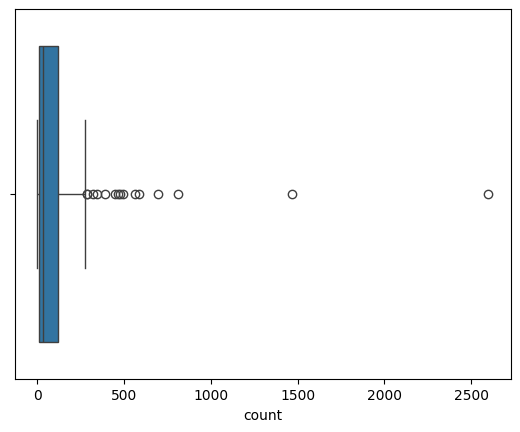

In [24]:
sns.boxplot(df_players['country'].value_counts(), orient= 'h')

In [25]:
df_players['country'].value_counts().head(20)

country
RUS    2598
GER    1468
USA     809
ESP     693
SRB     589
UKR     561
FRA     492
HUN     479
POL     468
IND     449
NED     392
CZE     347
CUB     322
ENG     287
ARG     287
ROU     273
COL     264
CRO     262
ITA     260
AUT     253
Name: count, dtype: int64

a ver los paises que tienen mas de 500 jugadores

In [26]:
cc = df_players['country'].value_counts()
df_country_500p = df_players[df_players['country'].isin(cc[cc > 500].index)]
df_country_500p.head()


,Unnamed: 0,id,name,title,woman_title,country,classical,rapid,blitz,birth_year,sex,active
1,1,4611870,"Keller-Hermann, Edith",WGM,WGM,GER,2290.0,NaN,NaN,1921-01-01,F,0
2,2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921-01-01,M,0
3,3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921-01-01,M,0
4,4,4101529,"Averbakh, Yuri L",GM,NaN,RUS,2445.0,NaN,NaN,1922-01-01,M,0
5,5,4103424,"Khasin, Abram",IM,NaN,RUS,2318.0,NaN,NaN,1923-01-01,M,0


elos por pais

In [27]:
# medias de elo/ tipo partida
df_medias_elo = df_country_500p.groupby('country', as_index= False)[['classical', 'rapid', 'blitz']].mean()
df_medias_elo['media global'] = df_medias_elo[['classical', 'rapid', 'blitz']].mean(axis= 1)
df_medias_elo


,country,classical,rapid,blitz,media global
0,ESP,2272.422799,2229.110220,2239.725843,2247.086288
1,GER,2275.809134,2287.046512,2277.386541,2280.080729
2,RUS,2270.991914,2218.436821,2203.687388,2231.038708
3,SRB,2249.102041,2254.728532,2241.860274,2248.563616
4,UKR,2302.153298,2261.704715,2258.928191,2274.262068
5,USA,2245.215174,2297.297436,2203.494810,2248.669140


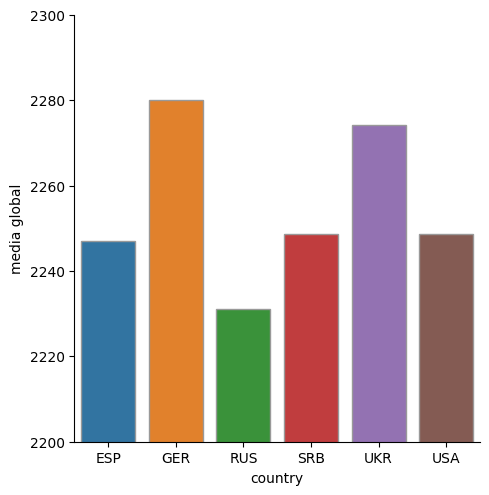

In [28]:
sns.catplot(x="country",
            y = "media global",
            hue = "country",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=df_medias_elo);
plt.ylim(2200, 2300)
#plt.savefig('elo_global_por_federaciones.png')
plt.show()

a ver los elos por federaciones en funcion del estilo de juego

classic, rapid y blitz

esta grafica al final la obvie porque me parecio mucha info para la diapositiva y mi intencion es hacer un acercamiento suave al publico

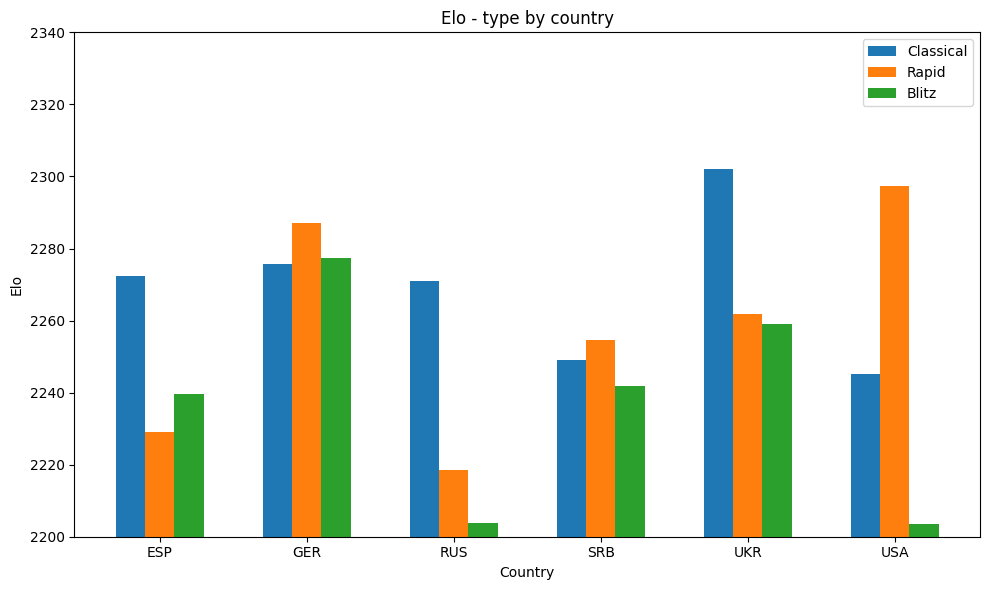

In [29]:

categorias = df_medias_elo['country']
variables_numericas = {
    'Classical': df_medias_elo['classical'],
    'Rapid': df_medias_elo['rapid'],
    'Blitz': df_medias_elo['blitz']
}

# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Ancho de las barras
bar_width = 0.2

# Índices para las posiciones de las barras
indice = np.arange(len(categorias))

# Gráfico de barras para cada variable numérica
for i, (variable, valores) in enumerate(variables_numericas.items()):
    ax.bar(indice + i * bar_width, valores, bar_width, label=variable)

# Configuración de ejes y etiquetas
ax.set_xlabel('Country')
ax.set_ylabel('Elo')
ax.set_title('Elo - type by country')
ax.set_xticks(indice + bar_width)
ax.set_xticklabels(categorias)
ax.legend()
plt.ylim(2200, 2340)

# Mostrar la gráfica
plt.tight_layout()
#plt.savefig('elo_tipos_por_paises.png')
plt.show()



<Axes: xlabel='birth_year'>

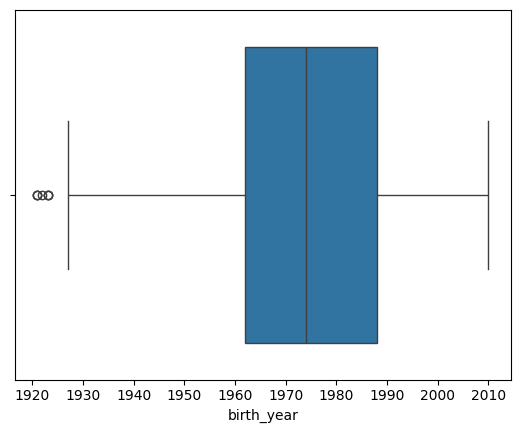

In [30]:
#boxplot del año de nacimiento de los paises com mas titulados
# quiero ver la edad mas o menos de los jugadores de paises con mas q de jugadores
sns.boxplot(df_country_500p['birth_year'], orient= 'h')

voy a ver los años en que se titularon los jugadores y ver como estan distribuidos  
aqui vuelvo al df original con todos los jugadores y todos los paises

In [31]:
df_titles = pd.read_csv('df_year_titled.csv')
df_titles.drop(columns= ['Unnamed: 0', 'name', 'title', 'woman_title', 'Woman Candidate Master (WCM)', 'Candidate Master (CM)'], inplace= True)
df_titles.head()

,country,Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
0,SGP,NaN,NaN,NaN,NaN,NaN,NaN
1,GER,NaN,NaN,1950.0,NaN,1978.0,NaN
2,USA,NaN,NaN,NaN,NaN,NaN,NaN
3,GER,NaN,NaN,NaN,NaN,NaN,NaN
4,RUS,NaN,NaN,NaN,1951.0,NaN,1952.0


In [32]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19509 entries, 0 to 19508
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           19509 non-null  object 
 1   Woman FIDE Master (WFM)           1806 non-null   float64
 2   FIDE Master (FM)                  6547 non-null   float64
 3   Woman International Master (WIM)  1008 non-null   float64
 4   International Master (IM)         4866 non-null   float64
 5   Woman Grandmaster (WGM)           434 non-null    float64
 6   Grandmaster (GM)                  1661 non-null   float64
dtypes: float64(6), object(1)
memory usage: 1.0+ MB


In [33]:
# vamos a ver las descriptivas de RUS y USA
df_titles_USA = df_titles[df_titles['country'] == 'USA']
df_titles_RUS = df_titles[df_titles['country'] == 'RUS']


In [34]:
# la idea de esta funcion es obtener un df con la cantidad de titulos se obtivieron en cada año
def titulos_anio(df):
    data = {'q': []}
    for anio in range(1950, 2022):  # el año minimo y maximo, con esto visualizaremos el eje x
        q = (df == anio).sum().sum() # esto va trabajando por columna (sumando la cantidad de Trues por cada columna) y luego suma todas las columnas
        data['q'].append(q)
    return pd.DataFrame(data, index= [i for i in range(1950, 2022)])
   

años de obtencion de titulos en USA y RUS

In [35]:
df_tiles_anio_usa = titulos_anio(df_titles_USA)
df_tiles_anio_rus = titulos_anio(df_titles_RUS)


In [36]:
df_tiles_anio_usa.sum() #comprobaciones mias

q    671
dtype: int64

In [37]:
df_tiles_anio_rus.sum() # comprobaciones mias

q    2327
dtype: int64

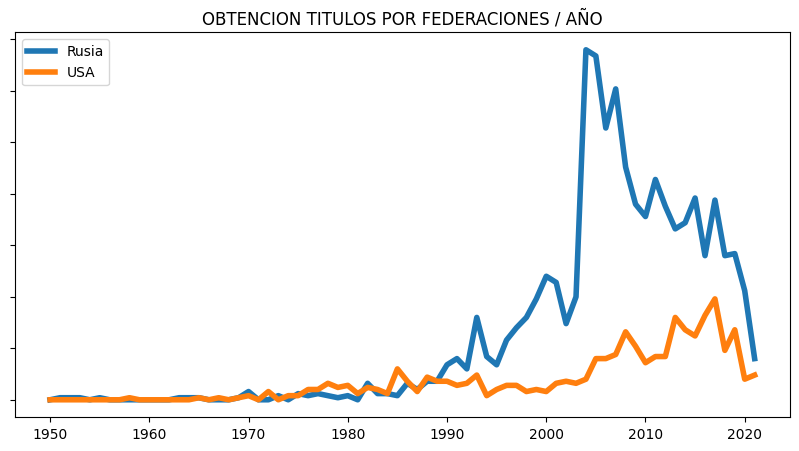

In [80]:
plt.figure(figsize= (10, 5))
plt.plot(df_tiles_anio_rus, label= 'Rusia', linewidth=4)
plt.plot(df_tiles_anio_usa, label= 'USA', linewidth=4)
plt.title('OBTENCION TITULOS POR FEDERACIONES / AÑO')
plt.legend(loc='upper left')
plt.gca().set_yticklabels([])
#plt.savefig('usa_rus_titulos_por_año.png', transparent= True)
#plt.show()

In [39]:
df_tiles_anio_rus.sort_values(by= 'q', ascending= False)

,q
2004,170
2005,167
2007,151
2006,132
2008,113
...,...
1962,0
1972,0
1971,0
1966,0


me llama la atencion un aumento de titulados tna bestia en el periodo 2002-2005, voy a mirar los otros paises tb


In [40]:
df_country_500p['country'].unique() # los paises con  mas de 500 jugadores

array(['GER', 'USA', 'RUS', 'SRB', 'UKR', 'ESP'], dtype=object)

In [41]:
df_titles_ger= df_titles[df_titles['country'] == 'GER']
df_titles_srb = df_titles[df_titles['country'] == 'SRB']
df_titles_ukr = df_titles[df_titles['country'] == 'UKR']
df_titles_esp = df_titles[df_titles['country'] == 'ESP']
df_tiles_anio_ger = titulos_anio(df_titles_ger)
df_tiles_anio_srb = titulos_anio(df_titles_srb)
df_tiles_anio_ukr = titulos_anio(df_titles_ukr)
df_tiles_anio_esp = titulos_anio(df_titles_esp)


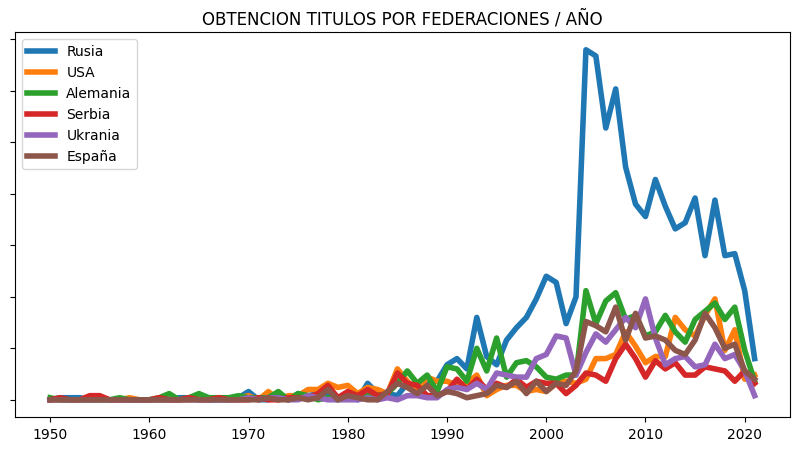

In [81]:
plt.figure(figsize= (10, 5))
plt.plot(df_tiles_anio_rus, label= 'Rusia', linewidth=4)
plt.plot(df_tiles_anio_usa, label= 'USA', linewidth=4)
plt.plot(df_tiles_anio_ger, label= 'Alemania', linewidth=4)
plt.plot(df_tiles_anio_srb, label= 'Serbia', linewidth=4)
plt.plot(df_tiles_anio_ukr, label= 'Ukrania', linewidth=4)
plt.plot(df_tiles_anio_esp, label= 'España', linewidth=4)
plt.title('OBTENCION TITULOS POR FEDERACIONES / AÑO')
plt.legend(loc='upper left')
plt.gca().set_yticklabels([])
#plt.savefig('paises_titulos_por_año.png', transparent= True);

#plt.show()

alrededor de los 2000 hay un gran aumento en la cantidad de titulos fide otorgados

he buceado por la red y encontrado alguna referencia a mas titulos femeninos otorgados, podria ser esta la causa?

estudio la hipotesis

In [43]:
df_titles.columns # quiero sacar las columnas femeninas, mi idea es hacer un copia pega de la salida para el snippet de la siguiente celda =P

Index(['country', 'Woman FIDE Master (WFM)', 'FIDE Master (FM)',
       'Woman International Master (WIM)', 'International Master (IM)',
       'Woman Grandmaster (WGM)', 'Grandmaster (GM)'],
      dtype='object')

In [59]:
df_titled_woman = df_titles[['Woman FIDE Master (WFM)', 'Woman International Master (WIM)', 'Woman Grandmaster (WGM)']]
# en este df aun estan las filas correspondientes a hombres, podria dropear las columnas NaN completas, pero al pasarle funcion definida antes no contara valores en esas celdas asi que no hay necesidad

In [50]:
df_titled_men = df_titles[['FIDE Master (FM)', 'International Master (IM)', 'Grandmaster (GM)']]
# podria darse el caso de que los titulos masculinos tambien aumentaran en este periodo exageradamente asi que quiero comprobar los titulos masculinos tambien

In [60]:
df_titled_anio_woman= titulos_anio(df_titled_woman)
df_titled_anio_men= titulos_anio(df_titled_men)

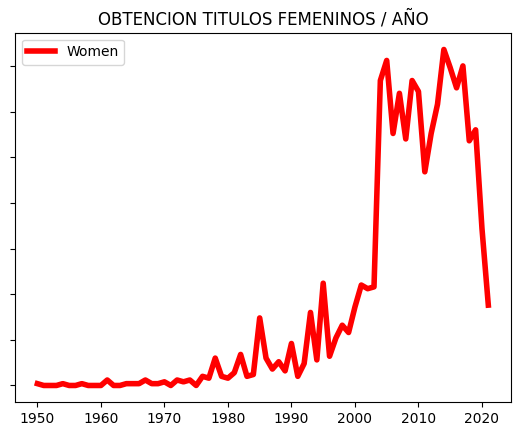

In [82]:
plt.plot(df_titled_anio_woman, label= 'Women', color= 'red', linewidth=4)
plt.title('OBTENCION TITULOS FEMENINOS / AÑO')
plt.legend(loc='upper left')
plt.gca().set_yticklabels([]);
#plt.savefig('titulos_año_woman.png', transparent= True)

# pues si hay un aumento femenino exponencial, parece corroborar la hipotesis

# VOY A COMPROBAR TAMBIEN LOS CHICOS

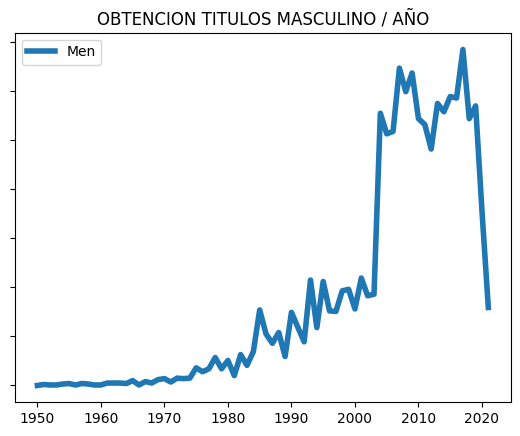

In [83]:
plt.plot(df_titled_anio_men, label= 'Men', linewidth=4)
plt.title('OBTENCION TITULOS MASCULINO / AÑO')
plt.legend(loc='upper left')
plt.gca().set_yticklabels([]);
#plt.savefig('titulos_año_man.png', transparent= True)

# meh, tambien aumenta exponencialmente, no parece que el auge de titulos femeninos fuera la causa del auge general de titulos. rechazo la hipotesis

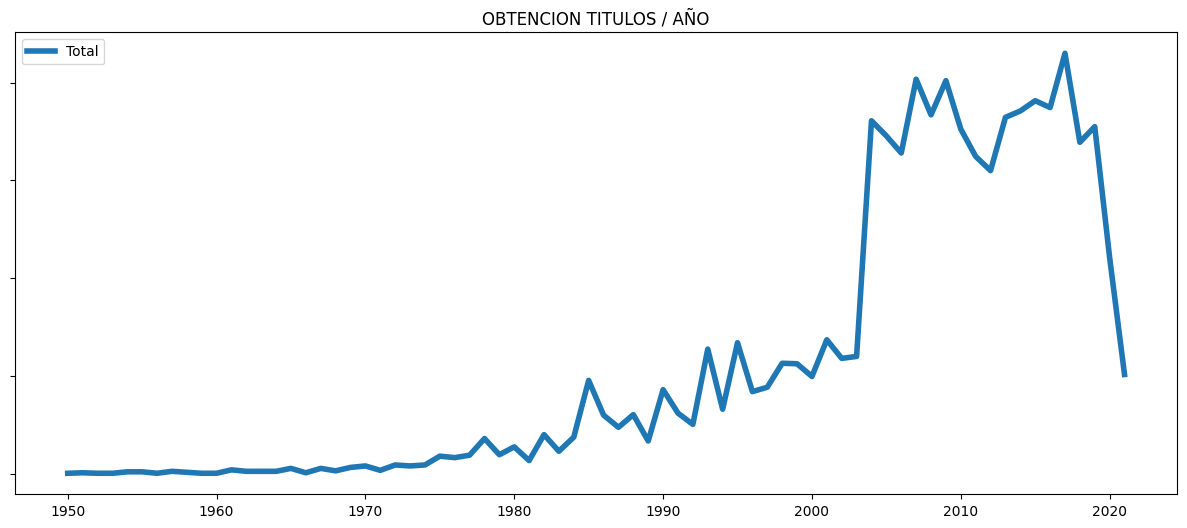

In [87]:
# todos los titulos emitidos en general sin separar por sexo, federacion ni nada

df_titles_anio = titulos_anio(df_titles)

plt.figure(figsize= (15, 6))
plt.plot(df_titles_anio, label= 'Total', linewidth=4)
plt.title('OBTENCION TITULOS / AÑO')
plt.legend(loc='upper left')
plt.gca().set_yticklabels([]);
#plt.savefig('titulos_año_total.png', transparent= True)
